In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [15]:
# If the dataset is in the same directory
df = pd.read_csv("regression_dataset.csv")

In [17]:
# Load the dataset
df = pd.read_csv("regression_dataset.csv")  # Replace with your actual dataset path

df = pd.get_dummies(df, columns=['Education'], drop_first=True)

In [19]:
# Features for Linear Regression
X = df[['Experience', 'Education_11', 'Education_12', 'Education_13', 'Education_14', 'Education_15', 'Education_16', 'Education_17', 'Education_18', 'Education_19']]
y_salary = df['Salary']

# Split data into training and testing sets for Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y_salary, test_size=0.2, random_state=42)

# Features for Logistic Regression (we'll predict 'Above_50K' using 'Experience' and 'Education')
y_class = df['Above_50K']

# Split data into training and testing sets for Logistic Regression
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

Linear Regression - Mean Squared Error: 23.814411210379838


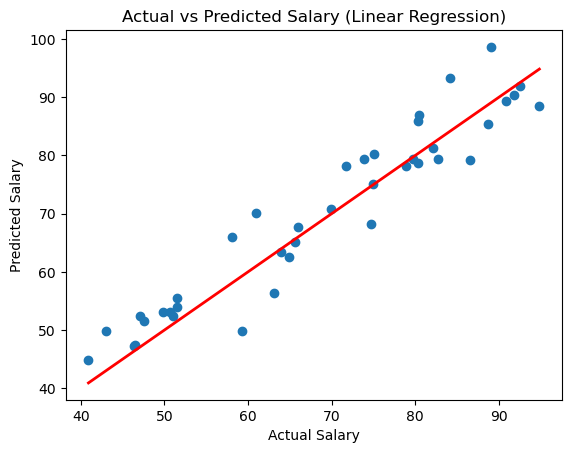

In [21]:
# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict salaries on the test set
y_pred_salary = linear_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_salary)
print(f"Linear Regression - Mean Squared Error: {mse}")

# Optional: Visualize Actual vs Predicted Salaries
plt.scatter(y_test, y_pred_salary)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (Linear Regression)')
plt.show()


Logistic Regression - Accuracy: 0.925

Confusion Matrix:

          Predicted 0  Predicted 1
Actual 0            4            3
Actual 1            0           33

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.92      1.00      0.96        33

    accuracy                           0.93        40
   macro avg       0.96      0.79      0.84        40
weighted avg       0.93      0.93      0.92        40



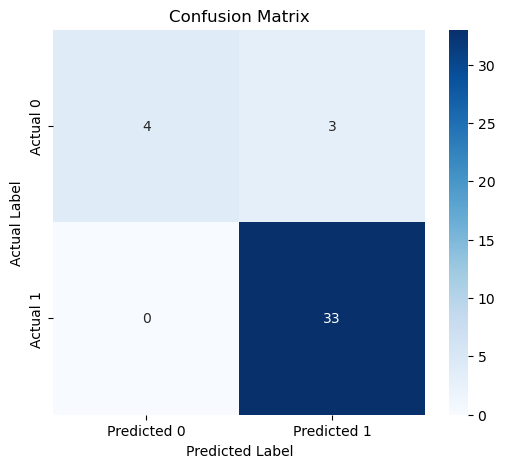

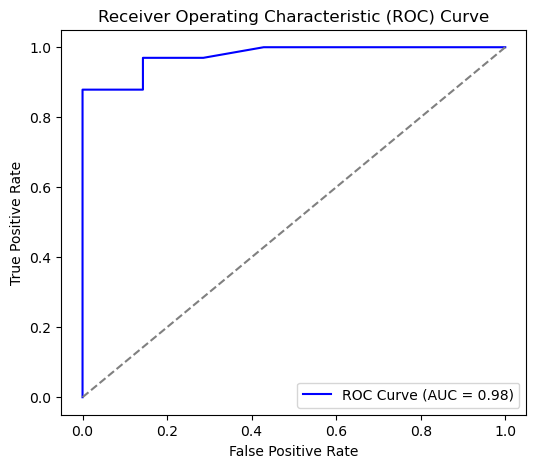

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)

# Create and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_class, y_train_class)

# Predict on the test set
y_pred_class = logistic_model.predict(X_test_class)
y_pred_prob = logistic_model.predict_proba(X_test_class)[:, 1]  # Probabilities for ROC

# Evaluate the model using Accuracy Score, Confusion Matrix, and Classification Report
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"\nLogistic Regression - Accuracy: {accuracy}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Display Confusion Matrix as a DataFrame
print("Confusion Matrix:\n")
print(pd.DataFrame(conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]))

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test_class, y_pred_class))

# --- PLOT CONFUSION MATRIX ---
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# --- PLOT ROC CURVE ---
fpr, tpr, _ = roc_curve(y_test_class, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()
